# In this notebook, we clean Florida Health Departments beach water test data during 2000-2017.

# 1. Loading the data

In [1]:
#importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Beach water quality data is stored in the following excel files
files_xls = ['2000.xls','2001.xls','2002.xls','2003.xls','2004.xls', '2006.xls','2007.xls','2008.xls','2009.xls',
'2010.xls','2011.xls','2012.xls','2013.xls','2014.xls','2015.xls','2016.xls','2017.xls']

In [3]:
#Loading the data into a dataframe called first_frame
first_frame = pd.DataFrame() #starting an empty dataframe
for f in files_xls: #for the file in 
    data = pd.read_excel(f) #load the data
    first_frame = first_frame.append(data) #append the data to the created dataframe

/Users/mustafa/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
first_frame.head()

,Advisory_Issue_Date,Advisory_Lifted_Date,AirTemp,Analysis_Time,Analysis_Time_FC,Analysis_date,Analysis_date_FC,Auto number,Batch_ID,Batch_ID_FC,...,enterococcus_code,fecalColiform,fecalColiform_code,last_upd,last_upd_uid,tmpec_GeoMean,uql,uql_EC,uql_FC,uql_fc
0,NaT,NaT,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GOOD,2,GOOD,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaT,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GOOD,2,GOOD,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaT,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GOOD,2,GOOD,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaT,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GOOD,49,GOOD,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaT,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GOOD,2,GOOD,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Here are the columns in our dataframe
first_frame.columns

Index(['Advisory_Issue_Date', 'Advisory_Lifted_Date', 'AirTemp',
       'Analysis_Time', 'Analysis_Time_FC', 'Analysis_date',
       'Analysis_date_FC', 'Auto number', 'Batch_ID', 'Batch_ID_FC',
       'CollectionTime', 'Collector', 'CommentField', 'County',
       'CurrentDirectionA', 'CurrentDirectionB', 'CurrentStrength', 'Date',
       'Lab_ID', 'MDL_EC', 'MDL_FC', 'Odd Comments', 'PeriodID', 'PoorResults',
       'RainFall24h', 'RainFall3d', 'RainLastWeek', 'Resample', 'SPID',
       'SPID.1', 'SPLocation', 'SPNo', 'SampleTime', 'TidalConditionsA',
       'TidalConditionsB', 'UQL_EC', 'UQL_FC', 'Updated', 'Value_Qual',
       'Value_Qual_FC', 'WaterQuality', 'WaterTemp', 'Weather', 'advisory',
       'autonumber', 'ec_GeoMean', 'ec_GeoMean_Code', 'enterococcus',
       'enterococcus_code', 'fecalColiform', 'fecalColiform_code', 'last_upd',
       'last_upd_uid', 'tmpec_GeoMean', 'uql', 'uql_EC', 'uql_FC', 'uql_fc'],
      dtype='object')

In [6]:
#We will remove the following columns from the dataframe, and create a new frame called df
remove = ['Advisory_Issue_Date', 'Advisory_Lifted_Date', 'CurrentDirectionB', 'CurrentStrength',
       'Analysis_Time', 'Analysis_Time_FC', 'Analysis_date',
       'Analysis_date_FC', 'Auto number', 'Batch_ID', 'Batch_ID_FC',
       'CollectionTime', 'Collector', 'CommentField', 'TidalConditionsA', 'TidalConditionsB',
       'CurrentDirectionA',
       'Lab_ID', 'MDL_EC', 'MDL_FC', 'Odd Comments', 'PeriodID', 'PoorResults',
       'Resample', 'SPID',
       'SPID.1', 'SPNo', 'SampleTime', 'UQL_EC', 'UQL_FC', 'Updated', 'Value_Qual',
       'Value_Qual_FC', 'WaterQuality', 'advisory',
       'autonumber', 'ec_GeoMean', 'ec_GeoMean_Code',
       'enterococcus_code', 'fecalColiform', 'fecalColiform_code', 'last_upd',
       'last_upd_uid', 'tmpec_GeoMean', 'uql', 'uql_EC', 'uql_FC', 'uql_fc']

df = first_frame.drop(remove, axis = 1) #removing the columns
df.columns
#printing the columns of df

Index(['AirTemp', 'County', 'Date', 'RainFall24h', 'RainFall3d',
       'RainLastWeek', 'SPLocation', 'WaterTemp', 'Weather', 'enterococcus'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199432 entries, 0 to 7886
Data columns (total 10 columns):
AirTemp         165484 non-null object
County          199432 non-null object
Date            199432 non-null datetime64[ns]
RainFall24h     183189 non-null object
RainFall3d      183173 non-null object
RainLastWeek    196215 non-null object
SPLocation      199432 non-null object
WaterTemp       196540 non-null object
Weather         196775 non-null object
enterococcus    196644 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 16.7+ MB


In [8]:
#Looks like the index changes from 0 to 7886
#We change the index in the dataframe from 0 to 199431 for no repeated indices
lst = [x for x in range(199432)]
s = pd.Series(lst)
df.set_index([s],inplace = True)

In [9]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            199422, 199423, 199424, 199425, 199426, 199427, 199428, 199429,
            199430, 199431],
           dtype='int64', length=199432)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199432 entries, 0 to 199431
Data columns (total 10 columns):
AirTemp         165484 non-null object
County          199432 non-null object
Date            199432 non-null datetime64[ns]
RainFall24h     183189 non-null object
RainFall3d      183173 non-null object
RainLastWeek    196215 non-null object
SPLocation      199432 non-null object
WaterTemp       196540 non-null object
Weather         196775 non-null object
enterococcus    196644 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 16.7+ MB


# 2. Handling missing/incorrect values and creating features

In [11]:
#Now we will turn empty/false entries into null values
#by changing ' ' (and other unexpected entries) in each column into NaN
#Previous analysis showed that 'Lab ID, FC BatchID, and FC Analysis date corrected on 1/19/2012 by wdp.' is an unexpected entry.
for column in ['AirTemp', 'RainFall24h', 'RainFall3d', 'RainLastWeek','WaterTemp', 'Weather','enterococcus']:
    df[column] = df[column].apply(lambda x: np.nan if x == ' ' or x == 'Lab ID, FC BatchID, and FC Analysis date corrected on 1/19/2012 by wdp.' else x)
    df[column] = df[column].astype('float') #finally turning them into numeric values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199432 entries, 0 to 199431
Data columns (total 10 columns):
AirTemp         165426 non-null float64
County          199432 non-null object
Date            199432 non-null datetime64[ns]
RainFall24h     183131 non-null float64
RainFall3d      183115 non-null float64
RainLastWeek    196157 non-null float64
SPLocation      199432 non-null object
WaterTemp       196482 non-null float64
Weather         196717 non-null float64
enterococcus    196586 non-null float64
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 16.7+ MB


In [13]:
#Removing the rows that has no enteroccocus values, since we can't detect pollution for those rows
df.dropna(axis = 0, subset = ['enterococcus'],inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196586 entries, 0 to 199431
Data columns (total 10 columns):
AirTemp         165185 non-null float64
County          196586 non-null object
Date            196586 non-null datetime64[ns]
RainFall24h     182946 non-null float64
RainFall3d      182930 non-null float64
RainLastWeek    195909 non-null float64
SPLocation      196586 non-null object
WaterTemp       196241 non-null float64
Weather         196471 non-null float64
enterococcus    196586 non-null float64
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 16.5+ MB


In [15]:
#We will add year, month, day columns based on the date column

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayofYear'] = df['Month'] * 30 + df['Day']

In [16]:
#The test results Pollution if the enterococcus level is above 70
#So we label each row accordingly
def categ(x):
    if 0 <= x < 70:
        return int(0)
    if 70 <= x:
        return int(1)

df['Pollution'] = df['enterococcus'].apply(categ)
df['Pollution'] = df['Pollution'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196586 entries, 0 to 199431
Data columns (total 15 columns):
AirTemp         165185 non-null float64
County          196586 non-null object
Date            196586 non-null datetime64[ns]
RainFall24h     182946 non-null float64
RainFall3d      182930 non-null float64
RainLastWeek    195909 non-null float64
SPLocation      196586 non-null object
WaterTemp       196241 non-null float64
Weather         196471 non-null float64
enterococcus    196586 non-null float64
Year            196586 non-null int64
Month           196586 non-null int64
Day             196586 non-null int64
DayofYear       196586 non-null int64
Pollution       196586 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(5), object(2)
memory usage: 24.0+ MB


In [17]:
#Now we will remove beaches that are polluted less than 0.01 of the time
#as these beaches are outliers in our dataset
#First we group these beaches in a list
clean_beaches = []
n_tests = 0
for beach in df.SPLocation.unique():
    if df[df['SPLocation'] == beach].Pollution.mean() < 0.01:
        n_tests += len(df[df['SPLocation'] == beach])
        clean_beaches.append(beach)

In [18]:
#Looks like there are 69 such beaches 
#and 24588 of the tests are on these beaches
print(len(clean_beaches),n_tests)

69 24588


In [19]:
#Now we remove these beaches
def clean(b): #first creating a mask as a function
    return b in clean_beaches

df['Clean'] = df['SPLocation'].apply(clean) #adding the mask as a truth value in a new column
df = df[df['Clean'] == False] #Now slicing the beaches which are not clean
df.drop(['Clean'],axis=1,inplace=True) #dropping the mask column

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171998 entries, 0 to 199431
Data columns (total 15 columns):
AirTemp         143827 non-null float64
County          171998 non-null object
Date            171998 non-null datetime64[ns]
RainFall24h     160426 non-null float64
RainFall3d      160410 non-null float64
RainLastWeek    171343 non-null float64
SPLocation      171998 non-null object
WaterTemp       171676 non-null float64
Weather         171900 non-null float64
enterococcus    171998 non-null float64
Year            171998 non-null int64
Month           171998 non-null int64
Day             171998 non-null int64
DayofYear       171998 non-null int64
Pollution       171998 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(5), object(2)
memory usage: 21.0+ MB


In [21]:
#We will also remove beaches that are sampled less than 100 times 
#as these beaches may not support a pattern in the dataset
sparse_beaches = []
n_tests = 0
for beach in df.SPLocation.unique():
    if len(df[df['SPLocation'] == beach]) < 100:
        n_tests += len(df[df['SPLocation'] == beach])
        sparse_beaches.append(beach)

In [22]:
#Looks like there are 33 such beaches 
#and 1477 of the tests are on these beaches
print(len(sparse_beaches),n_tests)

33 1477


In [23]:
#Similarly, we will remove these beaches from the dataset
def sparse(b): #creating a mask
    return b in sparse_beaches
df['Sparse'] = df['SPLocation'].apply(sparse)#adding the mask as a column
df = df[df['Sparse'] == False] #Now slicing the beaches which are not sparse
df.drop(['Sparse'],axis=1,inplace=True) #dropping the mask column

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170521 entries, 11 to 199396
Data columns (total 15 columns):
AirTemp         142573 non-null float64
County          170521 non-null object
Date            170521 non-null datetime64[ns]
RainFall24h     159828 non-null float64
RainFall3d      159812 non-null float64
RainLastWeek    169875 non-null float64
SPLocation      170521 non-null object
WaterTemp       170212 non-null float64
Weather         170436 non-null float64
enterococcus    170521 non-null float64
Year            170521 non-null int64
Month           170521 non-null int64
Day             170521 non-null int64
DayofYear       170521 non-null int64
Pollution       170521 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(5), object(2)
memory usage: 20.8+ MB


In [25]:
#There are 291 beaches left
df.SPLocation.nunique()

291

In [26]:
#Also, there exists 35 coastal counties in Florida
#But the dataframe contains 66 counties
df.County.nunique()

66

In [27]:
df.County.unique()

array(['Bay', 'Brevard', 'Broward', 'Charlotte', 'Citrus', 'Collier',
       'Dade', 'Dixie', 'Duval', 'Escambia', 'Franklin', 'Gulf',
       'Hernando', 'Hillsborough', 'Indian River', 'Lee', 'Levy',
       'Manatee', 'Martin', 'Monroe', 'Nassau', 'Okaloosa', 'Palm Beach',
       'Pasco', 'Pinellas', 'Santa Rosa', 'Sarasota', 'St Johns',
       'St Lucie', 'Taylor', 'Volusia', 'Wakulla', 'Walton',
       'Dade                ', 'Broward             ',
       'Lee                 ', 'Pinellas            ',
       'Citrus              ', 'Monroe              ',
       'Duval               ', 'Hillsborough        ',
       'Manatee             ', 'Walton              ',
       'Bay                 ', 'Charlotte           ',
       'Brevard             ', 'Okaloosa            ',
       'Indian River        ', 'Palm Beach          ',
       'Volusia             ', 'Collier             ',
       'Santa Rosa          ', 'Pasco               ',
       'Nassau              ', 'Martin          

In [28]:
#Looks like some counties are written with extra space at the end
#We remove those spaces with the .strip() function to reduce the number of counties to 33
df['County'] = df['County'].apply(lambda x: x.strip())
df.County.nunique()

33

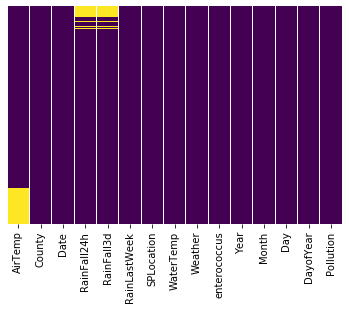

In [29]:
#Now we start handling missing values
#First let us see missing values in a heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

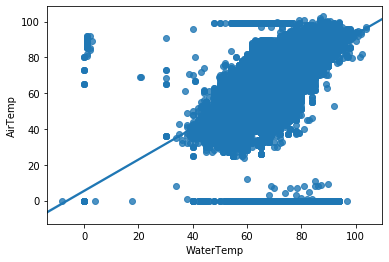

In [30]:
#We need to recover air temprature values 
#The following linear regression plot suggests a correlation between air temprature and water temprature
sns.regplot(x = 'WaterTemp', y = 'AirTemp', data = df[df['WaterTemp'] < 120])

In [31]:
#We will cover missing air temprature values as a linear function of water temprature 
#But first let us turn the outliers (values < 20) into null values
for column in ['AirTemp', 'WaterTemp']:
    df[column] = df[column].apply(lambda x: np.nan if x < 20  else x)
    df[column] = df[column].astype('float') #turning them into numeric

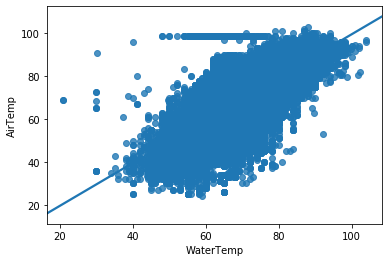

In [32]:
#After getting rid of those values we obtain a more clear correlation between the air temprature and the water temprature
sns.regplot(x = 'WaterTemp', y = 'AirTemp', data = df[df['WaterTemp'] < 120])

In [33]:
#Now we recover the missing air temprature based on water temperature
df['AirTemp'] = df['AirTemp'].fillna(7/8 * (df['WaterTemp']) + 13 )

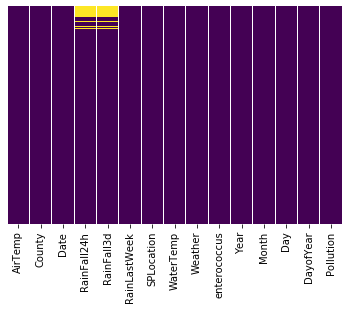

In [34]:
#Looking at a heatmap again we see that some RainFall24h and RainFall3d values are missing
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
#We recover those values as sensible functions of RainLastWeek
df['RainFall24h'] = df['RainFall24h'].fillna(df['RainLastWeek']/5)
df['RainFall3d'] = df['RainFall3d'].fillna(df['RainLastWeek']/2)

In [36]:
#Looking at the data info we see that few values are missing in several columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170521 entries, 11 to 199396
Data columns (total 15 columns):
AirTemp         170086 non-null float64
County          170521 non-null object
Date            170521 non-null datetime64[ns]
RainFall24h     169893 non-null float64
RainFall3d      169888 non-null float64
RainLastWeek    169875 non-null float64
SPLocation      170521 non-null object
WaterTemp       170026 non-null float64
Weather         170436 non-null float64
enterococcus    170521 non-null float64
Year            170521 non-null int64
Month           170521 non-null int64
Day             170521 non-null int64
DayofYear       170521 non-null int64
Pollution       170521 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(5), object(2)
memory usage: 20.8+ MB


In [37]:
#We fill Weather values with the bfill method
df.Weather.fillna(method='bfill',inplace = True)
#And check the possible values for Weather
df.Weather.value_counts() 

1.00    118958
2.00     44710
3.00      5891
0.00       949
0.33         4
0.04         3
1.41         3
1.05         3
Name: Weather, dtype: int64

In [38]:
#Weather values are supposed to be 1,2, or 3 (for sunny, cloudy, or rainy)
#We turn all weather values in to 1, 2, or 3.
df['Weather'] = df['Weather'].apply(lambda x: float(int(x)+1) if int(x) != x else x) #adding 1 to non-integer entries
df['Weather'] = df['Weather'].apply(lambda x: x+1 if x == 0 else x) #finally completing 0's to 1

In [39]:
#Finally we have no unexpected Weather values
df.Weather.value_counts()

1.0    119914
2.0     44716
3.0      5891
Name: Weather, dtype: int64

In [40]:
#We check the info one last time to see that there are five columns with few missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170521 entries, 11 to 199396
Data columns (total 15 columns):
AirTemp         170086 non-null float64
County          170521 non-null object
Date            170521 non-null datetime64[ns]
RainFall24h     169893 non-null float64
RainFall3d      169888 non-null float64
RainLastWeek    169875 non-null float64
SPLocation      170521 non-null object
WaterTemp       170026 non-null float64
Weather         170521 non-null float64
enterococcus    170521 non-null float64
Year            170521 non-null int64
Month           170521 non-null int64
Day             170521 non-null int64
DayofYear       170521 non-null int64
Pollution       170521 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(5), object(2)
memory usage: 20.8+ MB


In [41]:
#We fill those with the column mean
for column in ['RainFall24h', 'RainFall3d', 'RainLastWeek','AirTemp','WaterTemp']:
    df[column] = df[column].fillna(df[column].mean())

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170521 entries, 11 to 199396
Data columns (total 15 columns):
AirTemp         170521 non-null float64
County          170521 non-null object
Date            170521 non-null datetime64[ns]
RainFall24h     170521 non-null float64
RainFall3d      170521 non-null float64
RainLastWeek    170521 non-null float64
SPLocation      170521 non-null object
WaterTemp       170521 non-null float64
Weather         170521 non-null float64
enterococcus    170521 non-null float64
Year            170521 non-null int64
Month           170521 non-null int64
Day             170521 non-null int64
DayofYear       170521 non-null int64
Pollution       170521 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(5), object(2)
memory usage: 20.8+ MB


In [43]:
#For convenience in the feature we will now add columns that encode SPLocation, county, and region numerically

#List of counties
county_list = ['Escambia', 'Santa Rosa', 'Okaloosa', 'Walton', 'Bay', 'Gulf', 'Franklin', 'Wakulla', 'Jefferson', 
'Taylor', 'Dixie', 'Levy', 'Citrus', 'Hernando','Pasco', 'Pinellas', 'Hillsborough', 'Manatee', 'Sarasota', 
'Charlotte', 'Lee', 'Collier', 'Monroe','Dade', 'Broward', 'Palm Beach', 'Martin', 'St Lucie', 'Indian River', 
'Brevard','Volusia', 'Flagler', 'St Johns', 'Duval', 'Nassau']#list of coastal counties


#List of regions
gulf = ['Escambia', 'Santa Rosa', 'Okaloosa', 'Walton', 'Bay', 'Gulf', 'Franklin', 'Wakulla', 'Jefferson', 'Taylor', 
        'Dixie', 'Levy', 'Citrus', 'Hernando']
carribean = ['Pasco', 'Pinellas', 'Hillsborough', 'Manatee', 'Sarasota', 
        'Charlotte', 'Lee', 'Collier', 'Monroe']
south_atlantic = ['Dade', 'Broward', 'Palm Beach', 'Martin', 'St Lucie', 'Indian River', 'Brevard']
north_atlantic = ['Volusia', 'Flagler', 'St Johns', 'Duval', 'Nassau']

In [44]:
#We want to assign close numbers to close SPLocations
#Therefore, we group beaches in a list based on their neighboring counties
beach_list = []

for c in county_list:
    beach_list += df[df['County'] == c].SPLocation.unique().tolist()

In [45]:
#Now defining functions that assign numbers to regions, counties, and SPLocations
def region_no(county):
    if county in gulf:
        return 1
    if county in carribean:
        return 2
    if county in south_atlantic:
        return 3
    if county in north_atlantic:
        return 4

def county_no(county):
    return county_list.index(county) + 1

def beach_no(beach):
    return beach_list.index(beach) + 1

In [46]:
#Assigning numbers in a new column
df['Region Number'] = df['County'].apply(region_no)
df['County Number'] = df['County'].apply(county_no)
df['Beach Number'] = df['SPLocation'].apply(beach_no)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170521 entries, 11 to 199396
Data columns (total 18 columns):
AirTemp          170521 non-null float64
County           170521 non-null object
Date             170521 non-null datetime64[ns]
RainFall24h      170521 non-null float64
RainFall3d       170521 non-null float64
RainLastWeek     170521 non-null float64
SPLocation       170521 non-null object
WaterTemp        170521 non-null float64
Weather          170521 non-null float64
enterococcus     170521 non-null float64
Year             170521 non-null int64
Month            170521 non-null int64
Day              170521 non-null int64
DayofYear        170521 non-null int64
Pollution        170521 non-null int64
Region Number    170521 non-null int64
County Number    170521 non-null int64
Beach Number     170521 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(8), object(2)
memory usage: 24.7+ MB


In [48]:
#Let's see the columns of this dataframe
df.columns

Index(['AirTemp', 'County', 'Date', 'RainFall24h', 'RainFall3d',
       'RainLastWeek', 'SPLocation', 'WaterTemp', 'Weather', 'enterococcus',
       'Year', 'Month', 'Day', 'DayofYear', 'Pollution', 'Region Number',
       'County Number', 'Beach Number'],
      dtype='object')

In [49]:
#Finally we put columns in order to make it easier to follow
df = df[['SPLocation', 'Beach Number', 'County', 'County Number', 'Region Number', 'Date', 'Year', 'Month',
       'Day', 'DayofYear', 'Weather', 'WaterTemp', 'AirTemp', 'RainFall24h', 'RainFall3d',
       'RainLastWeek', 'enterococcus', 'Pollution']]

In [50]:
df.head()

,SPLocation,Beach Number,County,County Number,Region Number,Date,Year,Month,Day,DayofYear,Weather,WaterTemp,AirTemp,RainFall24h,RainFall3d,RainLastWeek,enterococcus,Pollution
11,BEACH DRIVE,44,Bay,5,1,2000-08-03,2000,8,3,243,2.0,83.0,82.0,0.20,0.50,1.0,32.0,0
12,BEACH DRIVE,44,Bay,5,1,2000-08-17,2000,8,17,257,1.0,83.0,85.0,0.12,0.30,0.6,12.0,0
13,BEACH DRIVE,44,Bay,5,1,2000-08-31,2000,8,31,271,2.0,82.0,78.0,0.00,0.00,0.0,8.0,0
14,BEACH DRIVE,44,Bay,5,1,2000-09-14,2000,9,14,284,1.0,84.0,82.0,0.16,0.40,0.8,4.0,0
15,BEACH DRIVE,44,Bay,5,1,2000-09-28,2000,9,28,298,2.0,78.0,75.0,0.58,1.45,2.9,4.0,0


In [51]:
#Storing the clean data as a csv file
df.to_csv('BeachTestData.csv', encoding='utf-8', index=False)